<a href="https://colab.research.google.com/github/k10sj02/tidy-pydy-tuesday/blob/main/2025_01_21_himalayan_expeditions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Himalayan Expeditions TidyTuesday (2025-01-21)

This notebook explores the **Himalayan Expeditions dataset** from TidyTuesday (2025-01-21).  
The dataset includes expedition and peak-level data, including peak heights, climbing status, expedition details, and outcomes.

**Source:** [TidyTuesday 2025-01-21 Readme](https://github.com/rfordatascience/tidytuesday/blob/main/data/2025/2025-01-21/readme.md)

# ================================
#       DATA LOADING
# ================================


In [12]:
!wget --user-agent="Mozilla/5.0" -O himalaya.zip "https://www.himalayandatabase.com/downloads/Himalayan%20Database.zip"

--2025-11-06 20:44:36--  https://www.himalayandatabase.com/downloads/Himalayan%20Database.zip
Resolving www.himalayandatabase.com (www.himalayandatabase.com)... 66.96.146.129
Connecting to www.himalayandatabase.com (www.himalayandatabase.com)|66.96.146.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42737250 (41M) [application/zip]
Saving to: ‘himalaya.zip’

himalaya.zip        100%[===================>]  40.76M  2.35MB/s    in 17s     

2025-11-06 20:44:54 (2.34 MB/s) - ‘himalaya.zip’ saved [42737250/42737250]



In [13]:
import tempfile
import zipfile

extract_dir = tempfile.mkdtemp()

with zipfile.ZipFile("himalaya.zip", "r") as z:
    z.extractall(extract_dir)

extract_dir

'/var/folders/7t/nscydqzn0_zd1gy0r57jw6_c0000gp/T/tmpizutzs7k'

In [14]:
import os
import glob

peaks_dbf = glob.glob(os.path.join(extract_dir, "**", "peaks.DBF"), recursive=True)[0]
exped_dbf = glob.glob(os.path.join(extract_dir, "**", "exped.DBF"), recursive=True)[0]

peaks_dbf, exped_dbf

('/var/folders/7t/nscydqzn0_zd1gy0r57jw6_c0000gp/T/tmpizutzs7k/Himalayan Database/HIMDATA/peaks.DBF',
 '/var/folders/7t/nscydqzn0_zd1gy0r57jw6_c0000gp/T/tmpizutzs7k/Himalayan Database/HIMDATA/exped.DBF')

In [15]:
from dbfread import DBF
import pandas as pd

peaks_records = list(DBF(peaks_dbf, load=True, char_decode_errors='ignore'))
exped_records = list(DBF(exped_dbf, load=True, char_decode_errors='ignore'))

peaks_temp = pd.DataFrame(peaks_records)
exped_temp = pd.DataFrame(exped_records)

In [16]:
himal_map = {
    0: "Unclassified",
    1: "Annapurna",
    2: "Api/Byas Risi/Guras",
    3: "Damodar",
    4: "Dhaulagiri",
    5: "Ganesh/Shringi",
    6: "Janak/Ohmi Kangri",
    7: "Jongsang",
    8: "Jugal",
    9: "Kangchenjunga/Simhalila",
    10: "Kanjiroba",
    11: "Kanti/Palchung",
    12: "Khumbu",
    13: "Langtang",
    14: "Makalu",
    15: "Manaslu/Mansiri",
    16: "Mukut/Mustang",
    17: "Nalakankar/Chandi/Changla",
    18: "Peri",
    19: "Rolwaling",
    20: "Saipal"
}

peaks_temp["HIMAL_FACTOR"] = peaks_temp["HIMAL"].map(himal_map).fillna("Unknown")


In [17]:
region_map = {
    0: "Unclassified",
    1: "Kangchenjunga-Janak",
    2: "Khumbu-Rolwaling-Makalu",
    3: "Langtang-Jugal",
    4: "Manaslu-Ganesh",
    5: "Annapurna-Damodar-Peri",
    6: "Dhaulagiri-Mukut",
    7: "Kanjiroba-Far West"
}

peaks_temp["REGION_FACTOR"] = peaks_temp["REGION"].map(region_map).fillna("Unknown")


In [18]:
phost_map = {
    0: "Unclassified",
    1: "Nepal only",
    2: "China only",
    3: "India only",
    4: "Nepal & China",
    5: "Nepal & India",
    6: "Nepal, China & India"
}

peaks_temp["PHOST_FACTOR"] = peaks_temp["PHOST"].map(phost_map).fillna("Unknown")


In [19]:
pstatus_map = {
    0: "Unknown",
    1: "Unclimbed",
    2: "Climbed"
}

peaks_temp["PSTATUS_FACTOR"] = peaks_temp["PSTATUS"].map(pstatus_map).fillna("Invalid")


In [20]:
season_map = {
    0: "Unknown",
    1: "Spring",
    2: "Summer",
    3: "Autumn",
    4: "Winter"
}

exped_temp["SEASON_FACTOR"] = exped_temp["SEASON"].map(season_map)


In [21]:
host_map = {
    0: "Unknown",
    1: "Nepal",
    2: "China",
    3: "India"
}

exped_temp["HOST_FACTOR"] = exped_temp["HOST"].map(host_map)


In [22]:
termreason_map = {
    0: "Unknown",
    1: "Success (main peak)",
    2: "Success (subpeak, foresummit)",
    3: "Success (claimed)",
    4: "Bad weather (storms, high winds)",
    5: "Bad conditions (deep snow, avalanching, falling ice, or rock)",
    6: "Accident (death or serious injury)",
    7: "Illness, AMS, exhaustion, or frostbite",
    8: "Lack (or loss) of supplies, support or equipment",
    9: "Lack of time",
    10: "Route technically too difficult, lack of experience, strength, or motivation",
    11: "Did not reach base camp",
    12: "Did not attempt climb",
    13: "Attempt rumored",
    14: "Other"
}

exped_temp["TERMREASON_FACTOR"] = exped_temp["TERMREASON"].map(termreason_map)


In [23]:
exped_tidy = exped_temp[exped_temp["YEAR"].astype(str).str.contains("202[0-4]")]
peaks_tidy = peaks_temp.copy()

# ================================
#       Exploratory Data Analysis
# ================================

Some data scientists remember the classic EDA steps as the **“Five D’s”** (informally used in teaching / internal notes):

- **Describe** – understand structure and summary statistics  
- **Detect missing / duplicates** – clean data  
- **Distributions** – visualize numeric/categorical columns  
- **Dependence / relationships** – correlations, group plots  
- **Deviations** – outliers, anomalies

In [24]:
peaks_tidy.head()

,PEAKID,PKNAME,PKNAME2,LOCATION,HEIGHTM,HEIGHTF,HIMAL,REGION,OPEN,UNLISTED,...,PSMTDATE,PCOUNTRY,PSUMMITERS,PSMTNOTE,REFERMEMO,PHOTOMEMO,HIMAL_FACTOR,REGION_FACTOR,PHOST_FACTOR,PSTATUS_FACTOR
0,AMAD,Ama Dablam,Amai Dablang,Khumbu Himal,6814,22356,12,2,True,False,...,Mar 13,"New Zealand, USA, UK","Mike Gill, Wally Romanes, Barry Bishop, Michae...",,None,W Face (High 126:5 May 1993)\r\nSE Face (High ...,Khumbu,Khumbu-Rolwaling-Makalu,Nepal only,Climbed
1,AMPG,Amphu Gyabjen,Amphu Gyabien,Khumbu Himal (N of Ama Dablam),5630,18471,12,2,True,False,...,Apr 11,UK,"John Hunt, Tom Bourdillon",,None,None,Khumbu,Khumbu-Rolwaling-Makalu,Nepal only,Climbed
2,ANN1,Annapurna I,,Annapurna Himal,8091,26545,1,5,True,False,...,Jun 03,France,"Maurice Herzog, Louis Lachenal",,Dyhrenfurth history 1950-1977 (MM 58:44-47 Nov...,S Face (High 122:3 Jan 1993) (Beghin accident)...,Annapurna,Annapurna-Damodar-Peri,Nepal only,Climbed
3,ANN2,Annapurna II,,Annapurna Himal,7937,26040,1,5,True,False,...,May 17,"UK, Nepal","Richard Grant, Chris Bonington, Ang Nyima Sherpa",,Dyhrenfurth history 1960-1976 (MM 51:36-37 Sep...,N Face (MM 51:36 Sep 1976),Annapurna,Annapurna-Damodar-Peri,Nepal only,Climbed
4,ANN3,Annapurna III,,Annapurna Himal,7555,24787,1,5,True,False,...,May 06,India,"Mohan S. Kohli, Sonam Gyatso, Sonam Girmi",,None,S Side (MM 125:11 Jan 1989)\r\nSW Face (MM 71:...,Annapurna,Annapurna-Damodar-Peri,Nepal only,Climbed


In [25]:
exped_tidy.head()

,EXPID,PEAKID,YEAR,SEASON,HOST,ROUTE1,ROUTE2,ROUTE3,ROUTE4,NATION,...,COMRTE,STDRTE,PRIMRTE,PRIMMEM,PRIMREF,PRIMID,CHKSUM,SEASON_FACTOR,HOST_FACTOR,TERMREASON_FACTOR
10416,EVER20101,EVER,2020,1,2,N Col-NE Ridge,,,,China,...,True,True,False,False,False,,2465291,Spring,China,Success (main peak)
10417,EVER20102,EVER,2020,1,2,N Col-NE Ridge,,,,China,...,True,True,False,False,False,,2465292,Spring,China,Success (main peak)
10418,EVER20103,EVER,2020,1,2,N Col-NE Ridge,,,,China,...,True,True,False,False,False,,2465293,Spring,China,Success (main peak)
10515,AMAD20301,AMAD,2020,3,1,SW Ridge,,,,Nepal,...,True,False,False,False,False,,2463299,Autumn,Nepal,Success (main peak)
10516,AMAD20302,AMAD,2020,3,1,SW Ridge,,,,USA,...,True,False,False,False,False,,2463299,Autumn,Nepal,Success (main peak)


In [26]:
with pd.option_context('display.max_columns', None):
  display(peaks_tidy.head())

,PEAKID,PKNAME,PKNAME2,LOCATION,HEIGHTM,HEIGHTF,HIMAL,REGION,OPEN,UNLISTED,TREKKING,TREKYEAR,RESTRICT,PHOST,PSTATUS,PEAKMEMO,PYEAR,PSEASON,PEXPID,PSMTDATE,PCOUNTRY,PSUMMITERS,PSMTNOTE,REFERMEMO,PHOTOMEMO,HIMAL_FACTOR,REGION_FACTOR,PHOST_FACTOR,PSTATUS_FACTOR
0,AMAD,Ama Dablam,Amai Dablang,Khumbu Himal,6814,22356,12,2,True,False,False,,,1,2,"Other map altitudes:\r\n 6814m - HMG-MT, HMG...",1961,1,AMAD61101,Mar 13,"New Zealand, USA, UK","Mike Gill, Wally Romanes, Barry Bishop, Michae...",,None,W Face (High 126:5 May 1993)\r\nSE Face (High ...,Khumbu,Khumbu-Rolwaling-Makalu,Nepal only,Climbed
1,AMPG,Amphu Gyabjen,Amphu Gyabien,Khumbu Himal (N of Ama Dablam),5630,18471,12,2,True,False,False,,Opened in 2002,1,2,"Other map altitudes:\r\n 5630m - HMG-Finn, N...",1953,1,AMPG53101,Apr 11,UK,"John Hunt, Tom Bourdillon",,None,None,Khumbu,Khumbu-Rolwaling-Makalu,Nepal only,Climbed
2,ANN1,Annapurna I,,Annapurna Himal,8091,26545,1,5,True,False,False,,,1,2,"Other map altitudes:\r\n 8091m - HMG-MT, HMG...",1950,1,ANN150101,Jun 03,France,"Maurice Herzog, Louis Lachenal",,Dyhrenfurth history 1950-1977 (MM 58:44-47 Nov...,S Face (High 122:3 Jan 1993) (Beghin accident)...,Annapurna,Annapurna-Damodar-Peri,Nepal only,Climbed
3,ANN2,Annapurna II,,Annapurna Himal,7937,26040,1,5,True,False,False,,,1,2,"Other map altitudes:\r\n 7937m - HMG-MT, HMG...",1960,1,ANN260101,May 17,"UK, Nepal","Richard Grant, Chris Bonington, Ang Nyima Sherpa",,Dyhrenfurth history 1960-1976 (MM 51:36-37 Sep...,N Face (MM 51:36 Sep 1976),Annapurna,Annapurna-Damodar-Peri,Nepal only,Climbed
4,ANN3,Annapurna III,,Annapurna Himal,7555,24787,1,5,True,False,False,,,1,2,"Other map altitudes:\r\n 7555m - HMG-MT, HMG...",1961,1,ANN361101,May 06,India,"Mohan S. Kohli, Sonam Gyatso, Sonam Girmi",,None,S Side (MM 125:11 Jan 1989)\r\nSW Face (MM 71:...,Annapurna,Annapurna-Damodar-Peri,Nepal only,Climbed


In [27]:
with pd.option_context('display.max_columns', None):
  display(exped_tidy.head())

,EXPID,PEAKID,YEAR,SEASON,HOST,ROUTE1,ROUTE2,ROUTE3,ROUTE4,NATION,LEADERS,SPONSOR,SUCCESS1,SUCCESS2,SUCCESS3,SUCCESS4,ASCENT1,ASCENT2,ASCENT3,ASCENT4,CLAIMED,DISPUTED,COUNTRIES,APPROACH,BCDATE,SMTDATE,SMTTIME,SMTDAYS,TOTDAYS,TERMDATE,TERMREASON,TERMNOTE,HIGHPOINT,TRAVERSE,SKI,PARAPENTE,CAMPS,ROPE,TOTMEMBERS,SMTMEMBERS,MDEATHS,TOTHIRED,SMTHIRED,HDEATHS,NOHIRED,O2USED,O2NONE,O2CLIMB,O2DESCENT,O2SLEEP,O2MEDICAL,O2TAKEN,O2UNKWN,OTHERSMTS,CAMPSITES,ROUTEMEMO,ACCIDENTS,ACHIEVMENT,AGENCY,COMRTE,STDRTE,PRIMRTE,PRIMMEM,PRIMREF,PRIMID,CHKSUM,SEASON_FACTOR,HOST_FACTOR,TERMREASON_FACTOR
10416,EVER20101,EVER,2020,1,2,N Col-NE Ridge,,,,China,Tibetan Rope-Fixing,Tibetan Rope-Fixing Everest North 2020,True,False,False,False,,,,,False,False,,Lhasa->Tingri->Everest BC,None,2020-05-26,1515,0,0,None,1,,8849,False,False,False,3,0,0,0,0,6,6,0,False,True,False,True,False,True,False,False,False,,"BC,ABC,C1,C2,C3,Smt(26/05)",None,,,Holy Mountain Adventure,True,True,False,False,False,,2465291,Spring,China,Success (main peak)
10417,EVER20102,EVER,2020,1,2,N Col-NE Ridge,,,,China,Ci Luo (Tselo),Chinese Mount Everest Survey Team,True,False,False,False,,,,,False,False,,,None,2020-05-27,0945,0,0,None,1,,8849,False,False,False,3,0,12,8,0,0,0,0,False,True,False,True,False,True,False,False,False,,"BC,ABC,C1,C2,C3,Smt(27/05)",From www.mt8848.com:\r\n\r\nThe 2020 Mount Eve...,,,,True,True,False,False,False,,2465292,Spring,China,Success (main peak)
10418,EVER20103,EVER,2020,1,2,N Col-NE Ridge,,,,China,Tsering Samdrup,Holy Mountain Adventure Everest Expedition 2020,True,False,False,False,,,,,False,False,,Lhasa->Tingri->Everest BC,2020-04-23,2020-05-28,0545,35,38,2020-05-31,1,,8849,False,False,False,3,0,20,14,0,22,21,0,False,True,False,True,False,True,False,False,False,,"BC(23/04,5200m),IC(26/04,5800m),ABC(05/01,6500...","Expedition Itinerary:\r\n\r\n23 Apr, arrived a...",,,Holy Mountain Adventure,True,True,False,False,False,,2465293,Spring,China,Success (main peak)
10515,AMAD20301,AMAD,2020,3,1,SW Ridge,,,,Nepal,Chhang Dawa Sherpa,Seven Summit Treks Ama Dablam Expedition 2020,True,False,False,False,,,,,False,False,"Canada, Czech Republic, France, Poland, Russia...",,2020-11-09,2020-11-10,1300,1,0,None,1,,6814,False,False,False,2,0,14,9,0,19,14,0,False,False,True,False,False,False,False,False,False,,"BC(09/11,4450m),C1(5600m),C2(5900m),Smt(10,12-...",None,,,Seven Summit Treks,True,False,False,False,False,,2463299,Autumn,Nepal,Success (main peak)
10516,AMAD20302,AMAD,2020,3,1,SW Ridge,,,,USA,Garrett Madison,Madison Mountaineering Ama Dablam Expedition 2020,True,False,False,False,,,,,False,False,"Canada, Qatar",Lukla->Pangboche->Ama Dablam BC,2020-11-01,2020-11-10,1300,9,11,2020-11-12,1,,6814,False,False,False,2,0,6,6,0,8,8,0,False,False,True,False,False,False,False,False,False,,"BC(01/11,4700m),C1(04/11,5600m),C2(10/11,6000m...","On summit day, team left high camp around 1:30...",,,Himalayan Guides,True,False,False,False,False,,2463299,Autumn,Nepal,Success (main peak)


In [28]:
print(peaks_tidy.shape)
print(exped_tidy.shape)

(490, 29)
(1030, 69)


In [29]:
peaks_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PEAKID          490 non-null    object
 1   PKNAME          490 non-null    object
 2   PKNAME2         490 non-null    object
 3   LOCATION        490 non-null    object
 4   HEIGHTM         490 non-null    int64 
 5   HEIGHTF         490 non-null    int64 
 6   HIMAL           490 non-null    int64 
 7   REGION          490 non-null    int64 
 8   OPEN            490 non-null    bool  
 9   UNLISTED        490 non-null    bool  
 10  TREKKING        490 non-null    bool  
 11  TREKYEAR        490 non-null    object
 12  RESTRICT        490 non-null    object
 13  PHOST           490 non-null    int64 
 14  PSTATUS         490 non-null    int64 
 15  PEAKMEMO        485 non-null    object
 16  PYEAR           490 non-null    object
 17  PSEASON         490 non-null    int64 
 18  PEXPID    

In [30]:
exped_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1030 entries, 10416 to 11577
Data columns (total 69 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EXPID              1030 non-null   object
 1   PEAKID             1030 non-null   object
 2   YEAR               1030 non-null   object
 3   SEASON             1030 non-null   int64 
 4   HOST               1030 non-null   int64 
 5   ROUTE1             1030 non-null   object
 6   ROUTE2             1030 non-null   object
 7   ROUTE3             1030 non-null   object
 8   ROUTE4             1030 non-null   object
 9   NATION             1030 non-null   object
 10  LEADERS            1030 non-null   object
 11  SPONSOR            1030 non-null   object
 12  SUCCESS1           1030 non-null   bool  
 13  SUCCESS2           1030 non-null   bool  
 14  SUCCESS3           1030 non-null   bool  
 15  SUCCESS4           1030 non-null   bool  
 16  ASCENT1            1030 non-null   object


<Axes: >

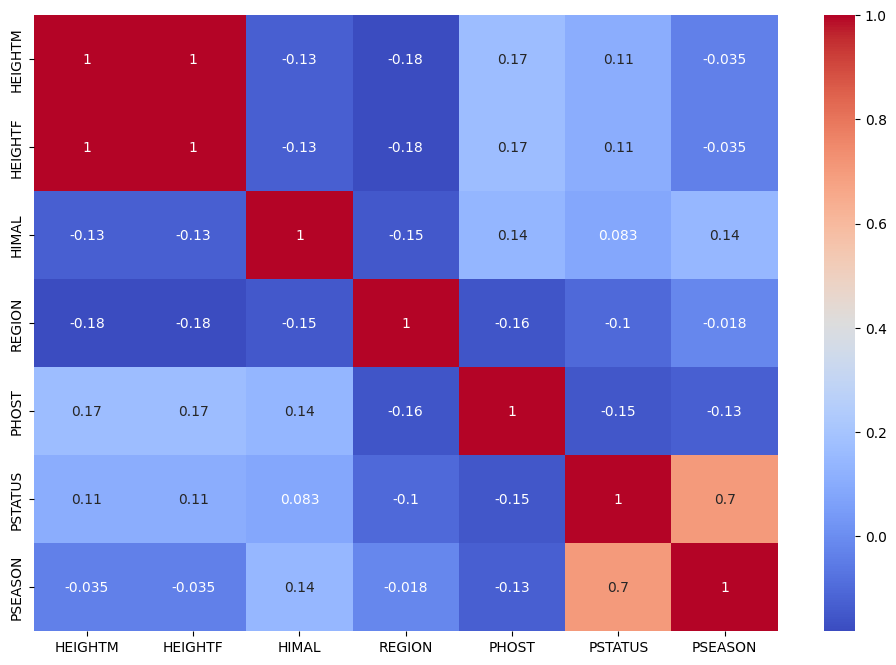

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only
numeric_cols = peaks_tidy.select_dtypes(include='number')

# Compute correlation
corr = numeric_cols.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# # Aside from PSTATUS and PSEASON (r≈0.7), most numeric variables show very weak correlations (-0.1 < r < 0.1).
# This suggests minimal linear dependencies among these features, reducing concerns about multicollinearity
# and indicating that each numeric variable may contribute independent information for modeling or further analysis.

In [ ]:
# Select numeric columns only
numeric_cols = exped_tidy.select_dtypes(include='number')

# Compute correlation
corr = numeric_cols.corr()
print(corr)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Most numeric variables show weak correlations (-0.1 to 0.1), indicating little linear relationship,
# except for a few strong correlations (e.g., SMTDAYS vs TOTDAYS, HIGHPOINT vs CAMPS),
# which may be important to consider for modeling or feature selection.

: 

: 

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Select numeric columns
numeric_cols = exped_tidy.select_dtypes(include='number')

# Compute Z-scores
z_scores = np.abs(stats.zscore(numeric_cols, nan_policy='omit'))

# Find outliers (Z > 3)
outlier_mask = z_scores > 3

# Count outliers per column
outlier_counts = pd.DataFrame(outlier_mask, columns=numeric_cols.columns).sum()
print("Number of Z-score outliers per numeric column:")
print(outlier_counts[outlier_counts > 0].sort_values(ascending=False))

# STATS NOTE: Standard deviation measures how spread out the data is from the
# mean, giving a “typical distance” of values from the average.
# Z-score tells us how many standard deviations a value is from the mean.
# Here, high |z| values indicate peaks whose heights are unusually far from
# the average, helping us detect outliers.

# Outlier analysis: columns like HOST, TERMREASON, and MDEATHS have many
# extreme values (Z > 3), which may need inspection or handling as they
# could skew downstream analyses.

: 

: 

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Select numeric columns
numeric_cols = peaks_tidy.select_dtypes(include='number')

# Compute Z-scores
z_scores = np.abs(stats.zscore(numeric_cols, nan_policy='omit'))

# Find outliers (Z > 3)
outlier_mask = z_scores > 3

# Count outliers per column
outlier_counts = pd.DataFrame(outlier_mask, columns=numeric_cols.columns).sum()
print("Number of Z-score outliers per numeric column:")
print(outlier_counts[outlier_counts > 0].sort_values(ascending=False))

# Identified extreme peak heights using Z-scores (>3 SD from mean); 9 peaks are outliers in both meters and feet

: 

: 

In [ ]:
peaks_tidy.describe()

# - HEIGHTM (meters) ranges from 5407 to 8849, with most peaks clustered around 6200-6900m.
# - The standard deviation (~569m) shows moderate spread; a few very high peaks (like 8849m) are likely outliers.
# - PHOST and REGION are mostly low integers; PSTATUS is mostly 1-2, suggesting most peaks have similar climbing status.
# - PSEASON has a min of 0 and max of 4, indicating some missing or special cases for climbing season.

: 

: 

In [ ]:
exped_tidy.describe()

# SEASON: 1–4, mean ~2.1 → most expeditions in seasons 1–3
# HOST: 1–3, mean ~1.04 → majority of expeditions hosted by one primary country
# SMTDAYS / TOTDAYS: median 0, mean 7–8 → many expeditions with missing or zero duration data
# TERMREASON: 0–14, mean ~2.2 → some expeditions terminated for unusual reasons (high max)
# HIGHPOINT: 0–8849m, mean ~6902 → most expeditions summit around 6700–7126m; some outliers reaching 8849m
# CAMPS: 0–13, mean ~2.5 → most expeditions use 2–4 high camps, occasional outlier with many camps
# ROPE: 0–5200, mean ~18 → extreme outlier; most expeditions use little to no fixed rope
# TOTMEMBERS / SMTMEMBERS: median 6 & 2 → typical expedition has small team; some very large groups (max 37 & 31)
# MDEATHS / HDEATHS: mostly 0, max 5 & 3 → fatalities are rare but present
# TOTHIRED / SMTHIRED: median 1–2 → some expeditions rely heavily on hired personnel (max 58 & 43)
# CHKSUM: ~2.2M, likely an internal ID / consistency check, nothing analytically surprising

: 

: 

# ================================
#       Question-Driven Analysis
# ================================


In [ ]:
# 1. What is the distribution of climbing status (PSTATUS) across the different mountain ranges (HIMAL_FACTOR)?

print(peaks_tidy['PSTATUS'].unique())
# PSTATUS appears to be a categorical/binary variable (1, 2).
# I need to check the documentation to confirm what each code represents
# (e.g., success vs. failure, or other status categories).

print(peaks_tidy['HIMAL_FACTOR'].unique())
# HIMAL_FACTOR contains the names of mountain ranges.
# Some names include slashes because they refer to combined or adjacent sub-ranges.

# Next step: group PSTATUS by HIMAL_FACTOR to see how climbing status varies
# across mountain ranges (e.g., using a crosstab or histogram).

: 

: 

In [ ]:
table = (pd.crosstab
 (
    peaks_tidy['HIMAL_FACTOR'], # index: unique values become the ROWS of the table
    peaks_tidy['PSTATUS'], # columns: unique values become the COLUMNS of the table
    normalize='index'
    ).mul(100).round(2)
 )

table.sort_values(by=1, ascending=False, inplace=True)

# PSTATUS: 1 = Unclimbed, 2 = Climbed
# Among the mountain ranges, Kanti/Palchung has the highest proportion of unclimbed peaks,
# suggesting climbers were less successful there. Conversely, Damodar has the highest success rate,
# making it the most frequently summited range.

table

: 

: 

In [ ]:
peaks_tidy['PSTATUS'].value_counts().plot(kind='bar')

: 

: 

In [ ]:
# TODO: Create a horizontal dot plot using Plotly to illustrate this distribution.

: 

: 

In [ ]:
# 2. Which mountain range (HIMAL_FACTOR) has the highest average peak height (HEIGHTM)?

with pd.option_context('display.max_colwidth', None):
    display(peaks_tidy.groupby('HIMAL_FACTOR')['HEIGHTM'].unique())

# This shows that climbers have summited peaks of varying heights within each mountain range.
# Even within the same range, the difficulty and height of climbed peaks differ, so not all HIMAL_FACTOR ranges are equivalent.

: 

: 

In [ ]:
peaks_count = peaks_tidy.groupby('HIMAL_FACTOR')['HEIGHTM'].count()
peaks_count.sort_values(ascending = False, inplace = True)
peaks_count

# I decided to use the median rather than the mean because, before exploring the data,
# I intuitively felt that ranges with many peaks (e.g., 70+) versus very few peaks (e.g., 6+)
# might not be directly comparable, and the median gives a more robust central value in such cases.

: 

: 

In [ ]:
peaks_tidy.groupby('HIMAL_FACTOR')['HEIGHTM'].count().hist()

: 

: 

In [ ]:
peaks_mean = peaks_tidy.groupby('HIMAL_FACTOR')['HEIGHTM'].mean().astype(int)
peaks_mean.sort_values(ascending = False, inplace = True)
peaks_mean

# Among the mountain ranges, Kangchenjunga/Simhalila has the highest mean peak height at 7,237 meters,
# indicating that climbers attempting peaks in this range face greater elevation challenges compared to other ranges.

: 

: 

In [32]:
peaks_median = peaks_tidy.groupby('HIMAL_FACTOR')['HEIGHTM'].median().astype(int)
peaks_median.sort_values(ascending = False, inplace = True)
peaks_median

# I decided to use the median rather than the mean because, before exploring the data,
# I intuitively felt that ranges with many peaks (e.g., 75+) versus very few peaks (e.g., 6)
# might not be directly comparable, and the median gives a more robust central value in such cases.

# The median peak heights are generally higher than the mean for several ranges,
# indicating that a few lower peaks are pulling the averages down (leftward skew). Median
# provides a better sense of the "typical" peak in each range, especially for
# ranges with extreme height variations like Dhaulagiri and Saipal. For
# Kangchenjunga/Simhalila, the mean is 7237, median 7328 — fairly close.

# For Dhaulagiri, mean 6980 vs median 7133 — that’s a notable difference (~150 meters).
# This suggests there are some lower peaks in the dataset pulling the mean down, but the typical peak is higher.
# For Saipal, mean 6475 vs median 6737 — this is a bigger relative difference (~260 meters),
# showing a small number of very low peaks are skewing the mean downward.

HIMAL_FACTOR
Kangchenjunga/Simhalila      7328
Dhaulagiri                   7133
Annapurna                    7101
Jongsang                     6923
Saipal                       6737
Peri                         6730
Khumbu                       6710
Makalu                       6682
Api/Byas Risi/Guras          6610
Jugal                        6563
Manaslu/Mansiri              6538
Ganesh/Shringi               6537
Langtang                     6536
Rolwaling                    6480
Damodar                      6372
Janak/Ohmi Kangri            6323
Kanti/Palchung               6310
Kanjiroba                    6306
Nalakankar/Chandi/Changla    6254
Mukut/Mustang                6229
Name: HEIGHTM, dtype: int64

In [33]:
peak_stats = pd.concat([peaks_mean, peaks_median], axis=1)
peak_stats.columns = ['Mean_Height', 'Median_Height']
peak_stats['Height_Difference'] = peak_stats['Median_Height'] - peak_stats['Mean_Height']
peak_stats['Height_Difference_Percent'] = ((peak_stats['Height_Difference'] / peak_stats['Mean_Height'])).mul(100)
peak_stats.sort_values(by='Median_Height', ascending=False, inplace=True)
peak_stats

# The mean and median heights are similar for most ranges, but Saipal and Manaslu/Mansiri
# show the largest relative differences, indicating a few extreme peaks strongly
# influence the mean. Most other ranges have minor skew (<2%), suggesting peak
# heights are relatively balanced.

NameError: name 'peaks_mean' is not defined

<Axes: >

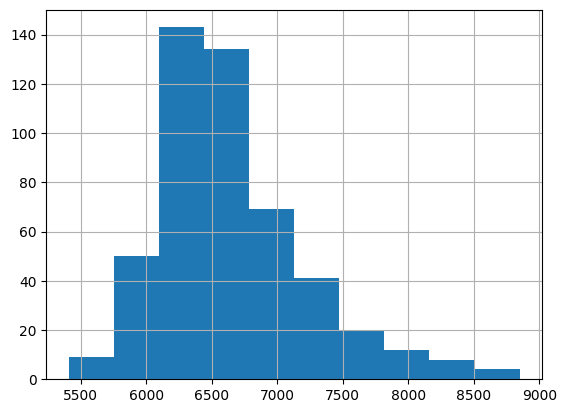

In [34]:
# 3. What is the distribution of peak heights (HEIGHTM) for peaks that are open (OPEN) versus not open?

peaks_tidy.HEIGHTM.hist()

# Visualizing the distribution of peak heights. Most peaks cluster between ~6100–6700 meters,
# indicating that the majority of Himalayan peaks in this dataset fall within this elevation range.


In [35]:
# Define bins (example: every 500 meters)
bins = range(6000, 8000 + 500, 500)  # adjust min/max as needed
labels = [f"{b}-{b+499}" for b in bins[:-1]]

# Create a binned column
peaks_tidy['HEIGHT_BIN'] = pd.cut(peaks_tidy['HEIGHTM'], bins=bins, labels=labels, right=False)


height_distribution = pd.pivot_table(
    peaks_tidy,
    index='HEIGHT_BIN',
    columns='OPEN',
    aggfunc='size',
    fill_value=0
)

total_row = pd.DataFrame(height_distribution.sum()).T
total_row.index = ['Total']
height_distribution_with_total = pd.concat([height_distribution, total_row])

height_distribution_with_total

# Most peaks are open, with the majority between 6000–6999m.
# Peaks above 7000m are more likely to be closed, likely due to greater risks,
# resulting in sparser data for higher elevations.

/var/folders/7t/nscydqzn0_zd1gy0r57jw6_c0000gp/T/ipykernel_10700/2037827857.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  height_distribution = pd.pivot_table(


OPEN,False,True
6000-6499,55,141
6500-6999,19,144
7000-7499,7,53
7500-7999,2,25
Total,83,363


In [36]:
# 4. Which climbing routes (ROUTE1, ROUTE2, ROUTE3, ROUTE4) have the highest
# success rates (SUCCESS1, SUCCESS2, SUCCESS3, SUCCESS4) across all expeditions?

# My original solution - I have a preference for using base Python at this stage of my journey

# List of route column names
route_col = ['ROUTE1', 'ROUTE2', 'ROUTE3', 'ROUTE4']

# List of success column names corresponding to each route
success_col = ['SUCCESS1', 'SUCCESS2', 'SUCCESS3', 'SUCCESS4']

# Dictionary to store counts of successful climbs per route
successful_counts = {}

# Loop over route numbers 1 through 4
for i in range(1, 5): 
    # Select the route column for this iteration
    route_series = exped_tidy['ROUTE' + str(i)]
    
    # Select the corresponding success column for this iteration
    success_series = exped_tidy['SUCCESS' + str(i)]
    
    # Boolean series: True where route exists and climb was successful
    successful_climbs = (route_series.notnull()) & (success_series == True)
    
    # Count the number of True values and store in dictionary
    successful_counts['ROUTE' + str(i)] = int(successful_climbs.sum())

# Print the dictionary with counts of successful climbs per route
print(successful_counts)

# Pythonic way - for reference

route_cols = ['ROUTE1', 'ROUTE2', 'ROUTE3', 'ROUTE4']
success_cols = ['SUCCESS1', 'SUCCESS2', 'SUCCESS3', 'SUCCESS4']
successful_counts = {}

for route, success in zip(route_cols, success_cols):
    successful_climbs = (exped_tidy[route].notnull()) & (exped_tidy[success] == True)
    successful_counts[route] = int(successful_climbs.sum())

print(successful_counts)

route_cols = ['ROUTE1', 'ROUTE2', 'ROUTE3', 'ROUTE4']
success_cols = ['SUCCESS1', 'SUCCESS2', 'SUCCESS3', 'SUCCESS4']


{'ROUTE1': 737, 'ROUTE2': 34, 'ROUTE3': 0, 'ROUTE4': 0}
{'ROUTE1': 737, 'ROUTE2': 34, 'ROUTE3': 0, 'ROUTE4': 0}


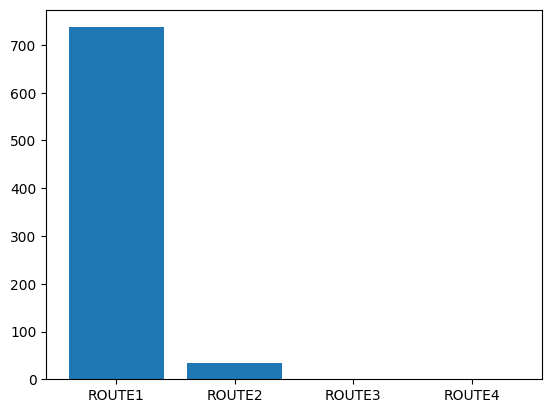

In [37]:
# Visualize the route success. 

plt.bar(range(len(successful_counts)), list(successful_counts.values()), align='center')
plt.xticks(range(len(successful_counts)), list(successful_counts.keys()))

plt.show()

In [38]:
# 5. How does the use of supplemental oxygen (O2USED, O2NONE) affect summit
# success rates?

# Restate the question: Compare summit success rates between expeditions that used 
# supplemental oxygen and those that did not. Determine whether oxygen use 
# is associated with higher or lower summit success.

# PSEUDOCODE
# For each expedition (row):
#   Check if O2 was used (O2USED = True) or not (O2NONE = True)
#   Check if the expedition was successful in any of the success columns (SUCCESS1-SUCCESS4)

# Count totals:
#   - Number of rows where Success = True in any column AND O2Used = True
#   - Number of rows where Success = True in any column AND O2Used = False

# Calculate proportion:
#   - Proportion of successful expeditions that used oxygen
#   - Proportion of successful expeditions that did not use oxygen

# Initialize counters for successful expeditions
successful_with_oxygen = 0
successful_without_oxygen = 0

for i in range(1, 5):
    # Boolean Series: True if O2 was used AND the expedition was successful on this route
    success_this_route_with_oxy = (exped_tidy['O2USED'] == True) & (exped_tidy['SUCCESS' + str(i)] == True)
    
    # Boolean Series: True if O2 was not used AND the expedition was successful on this route
    success_this_route_without_oxy = (exped_tidy['O2NONE'] == True) & (exped_tidy['SUCCESS' + str(i)] == True)
    
    # Add counts to totals
    successful_with_oxygen += success_this_route_with_oxy.sum()
    successful_without_oxygen += success_this_route_without_oxy.sum()

# Total successful expeditions across any SUCCESS column
total_successful = exped_tidy[['SUCCESS1','SUCCESS2','SUCCESS3','SUCCESS4']].any(axis=1).sum()

# Percentages relative to total successful expeditions
percentage_with_oxygen = (successful_with_oxygen / total_successful) * 100
percentage_without_oxygen = (successful_without_oxygen / total_successful) * 100

print(f"Successful expeditions using oxygen: {successful_with_oxygen} ({percentage_with_oxygen:.1f}%)")
print(f"Successful expeditions without oxygen: {successful_without_oxygen} ({percentage_without_oxygen:.1f}%)")

# Among all successful expeditions:
# - 57.5% involved the use of supplementary oxygen
# - 46.3% succeeded without using oxygen
# This shows that most successful expeditions involved oxygen use.

all_expeditions_that_used_oxygen = (exped_tidy['O2USED'] == True).sum()
all_expeditions_that_did_not_use_oxygen = (exped_tidy['O2NONE'] == True).sum()
successful_expeditions_with_oxygen = (all_expeditions_that_used_oxygen) & (total_successful)
successful_expeditions_without_oxygen = (all_expeditions_that_did_not_use_oxygen) & (total_successful)

# True success rate among expeditions that used oxygen
success_rate_with_oxygen = successful_with_oxygen / all_expeditions_that_used_oxygen * 100

# True success rate among expeditions that did not use oxygen
success_rate_without_oxygen = successful_without_oxygen / all_expeditions_that_did_not_use_oxygen * 100

print(f"Success rate for expeditions that used oxygen: {success_rate_with_oxygen:.1f}%")
print(f"Success rate for expeditions that did not use oxygen: {success_rate_without_oxygen:.1f}%")

# Climbers who used oxygen had a higher success rate (96%) compared to those who did not (60%).

Successful expeditions using oxygen: 426 (57.5%)
Successful expeditions without oxygen: 343 (46.3%)
Success rate for expeditions that used oxygen: 96.2%
Success rate for expeditions that did not use oxygen: 59.7%


In [39]:
# 6. How often does bad weather (TERMREASON = 4) cause termination compared to
# technical difficulty (TERMREASON = 10)?

exped_tidy['TERMREASON'].value_counts()

TERMREASON
1     738
4      90
5      59
7      29
0      29
2      26
12     16
14     13
10     11
6       6
9       5
8       5
11      2
3       1
Name: count, dtype: int64

In [40]:
bad_weather_count = (exped_tidy['TERMREASON'] == 4).sum()
technical_diff_count = (exped_tidy['TERMREASON'] == 10).sum()

print(f"Bad weather terminations: {bad_weather_count}")
print(f"Technical difficulty terminations: {technical_diff_count}")

total_terminations = len(exped_tidy)
print(f"Total number of terminations: {total_terminations}")

print(f"Bad weather termination rate: {(bad_weather_count/total_terminations)*100:.2f}" + "%")
print(f"Technical difficulty termination rate: {(technical_diff_count/total_terminations)*100:.2f}" + "%")

# The fact that weather caused terminations more often than technical difficulty suggests 
# that even well-prepared Himalayan climbers are highly vulnerable to environmental conditions.

Bad weather terminations: 90
Technical difficulty terminations: 11
Total number of terminations: 1030
Bad weather termination rate: 8.74%
Technical difficulty termination rate: 1.07%


In [41]:
exped_tidy.head()

,EXPID,PEAKID,YEAR,SEASON,HOST,ROUTE1,ROUTE2,ROUTE3,ROUTE4,NATION,...,COMRTE,STDRTE,PRIMRTE,PRIMMEM,PRIMREF,PRIMID,CHKSUM,SEASON_FACTOR,HOST_FACTOR,TERMREASON_FACTOR
10416,EVER20101,EVER,2020,1,2,N Col-NE Ridge,,,,China,...,True,True,False,False,False,,2465291,Spring,China,Success (main peak)
10417,EVER20102,EVER,2020,1,2,N Col-NE Ridge,,,,China,...,True,True,False,False,False,,2465292,Spring,China,Success (main peak)
10418,EVER20103,EVER,2020,1,2,N Col-NE Ridge,,,,China,...,True,True,False,False,False,,2465293,Spring,China,Success (main peak)
10515,AMAD20301,AMAD,2020,3,1,SW Ridge,,,,Nepal,...,True,False,False,False,False,,2463299,Autumn,Nepal,Success (main peak)
10516,AMAD20302,AMAD,2020,3,1,SW Ridge,,,,USA,...,True,False,False,False,False,,2463299,Autumn,Nepal,Success (main peak)


In [42]:
# NOTE: Boolean negation in pandas
# --------------------------------
# In pandas, `~` is the boolean NOT operator for Series.
# It flips True ↔ False and is cleaner than writing:
#     (df['col'] == False)
#
# Example:
#     df['NOHIRED']          → True, False, True
#     ~df['NOHIRED']         → False, True, False
#
# Usage in filters:
#     df[df['NOHIRED']]      → rows with NOHIRED == True
#     df[~df['NOHIRED']]     → rows with NOHIRED == False
#
# I replaced:
#     (df['NOHIRED'] == False)
# with:
#     ~df['NOHIRED']
#
# This is more idiomatic, shorter, and avoids unnecessary comparisons.

In [43]:
# 7. Are expeditions with no hired personnel (NOHIRED) associated with higher or
# lower death rates?

# Create a copy of the DataFrame to avoid SettingWithCopyWarning before adding TOTAL_DEATHS
exped_tidy = exped_tidy.copy()

# Calculate total deaths
exped_tidy.loc[:, 'TOTAL_DEATHS'] = exped_tidy['MDEATHS'].fillna(0) + exped_tidy['HDEATHS'].fillna(0)
int(exped_tidy['TOTAL_DEATHS'].sum())

# Masks

# In data science, a mask is basically a boolean array or series that “marks” 
# which rows (or elements) of your dataset meet a certain condition. 
# You can then use it to filter, select, or compute on only those rows.
# A mask acts like a stencil: it highlights the data you want and hides the rest.

no_hired = exped_tidy['NOHIRED']
hired = ~exped_tidy['NOHIRED']

# Calculate death count by whether groups hired personnel

death_count_no_hired = (no_hired & (exped_tidy['TOTAL_DEATHS'] > 0)).sum()
death_count_hired = (hired & (exped_tidy['TOTAL_DEATHS'] > 0)).sum()

# Total expeditions in each category
total_no_hired = no_hired.sum()
total_hired = hired.sum()

# Death rates
death_rate_no_hired = death_count_no_hired / total_no_hired
death_rate_hired = death_count_hired / total_hired

print(f"Death rate with no hired personnel: {death_rate_no_hired:.2%}, Death rate with hired personnel: {death_rate_hired:.2%}")

# Expeditions with no hired personnel had a death rate of 4.0%, 
# while expeditions that hired personnel had a nearly identical 
# death rate of 4.1%. This suggests that hiring personnel is not 
# associated with a meaningful difference in expedition mortality.

Death rate with no hired personnel: 4.00%, Death rate with hired personnel: 4.09%


In [44]:
# MACHINE LEARNING FINISHER 
# Predict whether an expedition will experience a death or 
# accident based on the size of the expedition (and optionally other features).

In [45]:
# Create a target variable:  HAS_DEATH (binary: 1 if TOTAL_DEATHS > 0, else 0)
# Feature variable: TOTMEMBERS (total expedition members)
# Optional additional features: NOHIRED, O2USED, SEASON, PEAKID, HOST_FACTOR

exped_tidy['HAS_DEATH'] = (exped_tidy['TOTAL_DEATHS'] > 0).astype(int)
exped_tidy['HAS_DEATH'].describe()

count    1030.000000
mean        0.040777
std         0.197869
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: HAS_DEATH, dtype: float64

In [46]:
exped_tidy['TOTMEMBERS'].describe()

count    1030.000000
mean        8.233981
std         6.659175
min         0.000000
25%         3.000000
50%         6.000000
75%        12.000000
max        37.000000
Name: TOTMEMBERS, dtype: float64

In [48]:
bins = [0, 5, 10, 15, 20, 50, 100]
labels = ['<5', '6-10', '11-15', '16-20', '21-50', '>50']
exped_tidy['SIZE_BIN'] = pd.cut(exped_tidy['TOTMEMBERS'], bins = bins, labels = labels)
exped_tidy.groupby('SIZE_BIN')['TOTMEMBERS'].size()

/var/folders/7t/nscydqzn0_zd1gy0r57jw6_c0000gp/T/ipykernel_10700/3885134282.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exped_tidy.groupby('SIZE_BIN')['TOTMEMBERS'].size()


SIZE_BIN
<5       443
6-10     268
11-15    188
16-20     62
21-50     52
>50        0
Name: TOTMEMBERS, dtype: int64

In [49]:
exped_tidy.groupby('SIZE_BIN')['HAS_DEATH'].sum()


/var/folders/7t/nscydqzn0_zd1gy0r57jw6_c0000gp/T/ipykernel_10700/4139192687.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exped_tidy.groupby('SIZE_BIN')['HAS_DEATH'].sum()


SIZE_BIN
<5       10
6-10     10
11-15    10
16-20     4
21-50     7
>50       0
Name: HAS_DEATH, dtype: int64

In [50]:
grouped = exped_tidy.groupby('SIZE_BIN')['HAS_DEATH']
death_rate = (grouped.sum() / grouped.size()) * 100
death_rate = death_rate[grouped.size() > 0]  # remove bins with zero expeditions
death_rate

# Death rate depends not just on number of deaths, but also on number of 
# expeditions in that size bin. Big groups might have fewer expeditions, 
# so the rate can look disproportionately high.

/var/folders/7t/nscydqzn0_zd1gy0r57jw6_c0000gp/T/ipykernel_10700/2506227870.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = exped_tidy.groupby('SIZE_BIN')['HAS_DEATH']


SIZE_BIN
<5        2.257336
6-10      3.731343
11-15     5.319149
16-20     6.451613
21-50    13.461538
Name: HAS_DEATH, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = exped_tidy[['TOTMEMBERS', 'NOHIRED', 'O2USED']]
y = exped_tidy['HAS_DEATH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       200
           1       0.11      0.67      0.20         6

    accuracy                           0.84       206
   macro avg       0.55      0.76      0.55       206
weighted avg       0.96      0.84      0.89       206

